# Librerías

In [1]:
import pandas as pd
import re
from datetime import datetime

# visualización
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from IPython.display import Image

## Funciones útiles

In [2]:
def make_specs( rows : int, cols : int, n : int) -> dict:
    """Makes the list of dictionaries to set the layout for the function make_subplots, especially for primes and specific grids.

    Args:
        rows (int): Number of rows for the grid
        cols (int): Number of columns for the grid
        n (int): Total number of figures

    Returns:
        dict: Grid for plotting
    """
    specs = []
    for i in range(rows):
        auxi = []
        for j in range(cols):
            if i*cols + j <= n:
                auxi.append({})
            else:
                auxi.append(None)
        specs.append(auxi)
    return specs

In [3]:
def hist_matrix(df : pd.DataFrame, columns : list = None, rows : int = None, cols : int = None) -> None:
    """Makes a matrix of histograms for each column of a pd.DataFrame

    Args:
        df (pd.DataFrame): Data to plot
        columns (list, optional): Columns to include in the matrix. Defaults to None.
        rows (int, optional): Number of rows for the matrix. Defaults to None.
        cols (int, optional): Number of columns for the matrix. Defaults to None.
    """
    if columns == None:
        columns = df.columns
    
    n = len(columns)

    if rows == None:
        rows = int(n**0.5)
    if cols == None:
        cols = int(n/rows + 0.99)
    
    if rows*cols < n:
        cols = int(n/rows + 0.99)

    specs = make_specs(rows, cols, n)
    fig1 = make_subplots(rows = rows, cols = cols,
                        specs= specs, subplot_titles= columns)

    for i, col in enumerate(columns):
        row = i//cols +1
        colum = i%cols + 1
        fig1.add_trace(go.Histogram(x=df[col], name=col, ) , row=row, col=colum)

    fig1.update_layout(title_text='Histogramas', showlegend=False)
    
    return fig1

In [4]:
def box_matrix(df : pd.DataFrame, columns : list = None, rows : int = None, cols : int = None) -> None:
    """Makes a matrix of boxes for each column of a pd.DataFrame

    Args:
        df (pd.DataFrame): Data to plot
        columns (list, optional): Columns to include in the matrix. Defaults to None.
        rows (int, optional): Number of rows for the matrix. Defaults to None.
        cols (int, optional): Number of columns for the matrix. Defaults to None.
    """
    if columns == None:
        columns = df.columns
    
    n = len(columns)

    if rows == None:
        rows = int(n**0.5)
    if cols == None:
        cols = int(n/rows + 0.99)
    
    if rows*cols < n:
        cols = int(n/rows + 0.99)

    specs = make_specs(rows, cols, n)
    fig1 = make_subplots(rows = rows, cols = cols,
                        specs= specs, subplot_titles= columns)

    for i, col in enumerate(columns):
        row = i//cols +1
        colum = i%cols + 1
        fig1.add_trace(go.Box(x=df[col], name=col, ) , row=row, col=colum)

    fig1.update_layout(title_text='Cajas', showlegend=False)
    
    return fig1

In [5]:
def remove_outliers_percentile(df: pd.DataFrame, quantile: float = 0.99, 
                    columns: list = None, upper: bool = True) -> pd.DataFrame:
    """REmoves outliers from a Dataframe

    Args:
        df (pd.DataFrame): _description_
        quantile (float, optional): _description_. Defaults to 0.99.
        columns (list, optional): _description_. Defaults to None.
        upper (bool, optional): _description_. Defaults to True.

    Returns:
        pd.DataFrame: _description_
    """
    if columns == None:
        columns = df.columns
    
    limits = df[columns].quantile(quantile)

    sign = 1
    if not upper:
        sign = -1
        
    for col in columns:
        df = df[sign*df[col] <= sign*limits[col]]
        
    return df

# Carga de datos

In [6]:
df_users = pd.read_csv('Datos_Enriquecidos/user_det.csv')

In [7]:
#df_users

In [8]:
#df_users.dtypes

## Nulos

In [9]:
#df_users.isnull().mean()

In [10]:
old_shape = df_users.shape[0]

In [11]:
df_users = df_users.dropna(subset=['Days Watched', 'Username'])

In [12]:
df_users.shape[0]/old_shape

0.9995967609653679

In [13]:
#df_users.isnull().mean()

## Borrar columnas altamente vacías

In [14]:
df_users = df_users.drop(['Gender', 'Birthday', 'Location'], axis=1)

# EDA

## Joined

In [15]:
df_users['Joined'] = pd.to_datetime(df_users['Joined'], errors='coerce')

In [16]:
#df_users.dtypes

# Outliers

In [17]:
#df_users.describe()

In [18]:
#df_users.columns

In [19]:
users_ol = ['Days Watched', 'Mean Score',
       'Watching', 'Completed', 'On Hold', 'Dropped', 'Plan to Watch',
       'Total Entries', 'Rewatched', 'Episodes Watched']

In [20]:
df_users = remove_outliers_percentile(df = df_users, columns = users_ol)

In [21]:
#df_users.shape[0]/old_shape

In [22]:
df_users.to_csv('Datos_Enriquecidos/users_limpios.csv')

# Visualización

## Estadísticos

In [23]:
df_users.describe()

,Mal ID,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched
count,6.976810e+05,697681.000000,697681.000000,697681.000000,697681.000000,697681.000000,697681.000000,697681.000000,697681.000000,697681.000000,697681.000000
mean,5.135915e+05,16.945238,3.789338,3.046216,42.643872,1.919502,2.399774,9.565577,59.576050,2.318841,1020.161529
std,3.638953e+05,33.136078,4.140274,6.757737,98.132612,5.750735,7.853171,28.842009,127.158801,8.595110,2002.094077
min,9.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.117050e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.316960e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,7.911170e+05,19.100000,8.030000,3.000000,34.000000,0.000000,0.000000,3.000000,53.000000,0.000000,1140.000000
max,1.291097e+06,241.900000,10.000000,61.000000,840.000000,55.000000,80.000000,289.000000,1165.000000,88.000000,15442.000000


## Muestra representativa

In [28]:
sample = df_users.sample(frac=0.001)
sample.describe()

,Mal ID,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,5.054846e+05,17.091691,3.909613,2.957020,42.133238,1.991404,2.053009,9.869628,59.004298,2.928367,1039.276504
std,3.569780e+05,34.008264,4.128399,6.439066,94.149280,5.987786,6.584735,31.683811,126.001509,10.258944,2045.403043
min,1.492000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.144140e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.279700e+05,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000
75%,7.751990e+05,19.175000,8.052500,3.000000,34.750000,0.000000,0.000000,2.750000,52.750000,0.000000,1148.500000
max,1.290541e+06,230.200000,10.000000,60.000000,744.000000,52.000000,73.000000,277.000000,918.000000,77.000000,13611.000000


## Histogramas

In [ ]:
#df_users.columns

In [30]:
users_num = ['Days Watched', 'Mean Score',
       'Watching', 'Completed', 'On Hold', 'Dropped', 'Plan to Watch',
       'Total Entries', 'Rewatched', 'Episodes Watched']

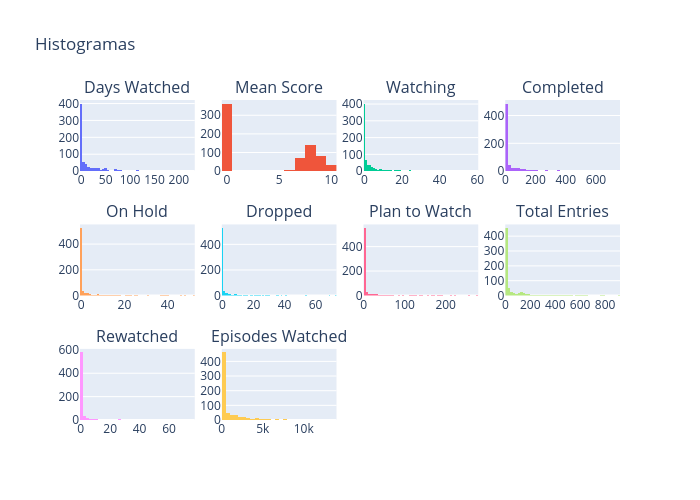

In [31]:
plot = hist_matrix(sample, users_num)
img = Image(plot.to_image(format = "png"))
display(img)

## Cajas

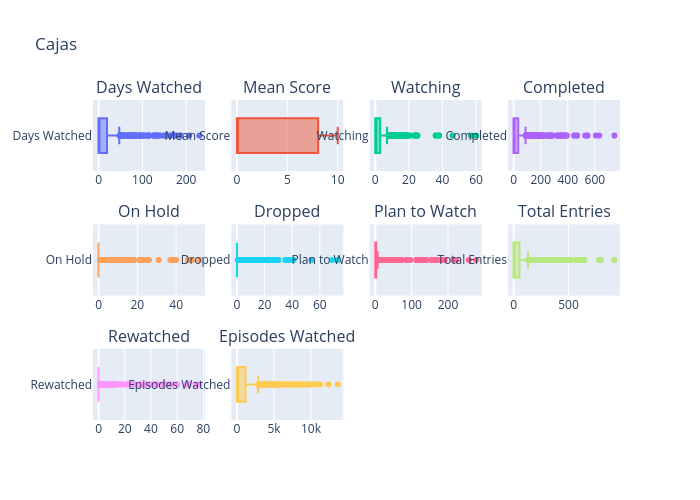

In [32]:
plot = box_matrix(sample, users_num)
img = Image(plot.to_image(format = "png"))
display(img)